# Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw

# Lectura de grafos

In [3]:
G = nx.read_pajek("Redes/EATnew_undir.net")
G2 = nx.read_gml("Red Diccionario/Oxford_Dict_Graph_Adj.gml")
G = nx.Graph(G)

# Transformación de los nombres de los nodos

In [4]:
mapping = dict(zip(G, [a.lower() for a in list(G.nodes())]))
G = nx.relabel_nodes(G, mapping)

# Intersección de nodos

In [5]:
nodes_dict=list(G2.nodes())
nodes_assoc=list(G.nodes())
nodes_subs=set(nodes_assoc).intersection(nodes_dict)

G_OX=G2.subgraph(nodes_subs)
G_EAT=G.subgraph(nodes_subs)

# Funciones de análisis

In [10]:
def imprime_info_grafo(G): 
    print('Número de nodos:', G.number_of_nodes())
    print('Número de ejes:', G.number_of_edges())
    print('Densidad:', nx.density(G))
    print('Clustering medio:', nx.average_clustering(G))
    #print(nx.average_degree_connectivity(G))
    giant_component = max(nx.connected_components(G), key=len)
    G_giant = G.subgraph(giant_component)
    print('Número de nodos (componente gigante):', G_giant.number_of_nodes())
    diameter_giant = nx.diameter(G_giant)
    print('Diámetro:', diameter_giant)
    
def check_small_world(G):
    print('Small world:', nx.sigma(G, niter=1, nrand=1))
    
def dibuja_distr_grado(G):
    degree_counts = nx.degree_histogram(G)
    degrees = range(len(degree_counts))
    plt.figure()
    plt.loglog(degrees, degree_counts, 'b.')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree distribution')
    plt.show()

# Análisis de la red EAT

In [18]:
imprime_info_grafo(G_EAT)

Número de nodos: 2905
Número de ejes: 15586
Densidad: 0.0036950636074403872
Clustering medio: 0.09579279900101276
Número de nodos (componente gigante): 2458
Diámetro: 7


## Red de mundo pequeño

In [6]:
giant_component = max(nx.connected_components(G_EAT), key=len)
G_giant = G_EAT.subgraph(giant_component)
check_small_world(G_giant)

## Guardar redes intersecadas

In [ ]:
giant_component = max(nx.connected_components(G_EAT), key=len)
G_giant = G_EAT.subgraph(giant_component)
nx.write_gml(G_giant, "Redes/EAT_giant.gml")

In [ ]:
giant_component = max(nx.connected_components(G_OX), key=len)
G_giant = G_OX.subgraph(giant_component)
nx.write_gml(G_giant, "Redes/OX_giant.gml")

## Page rank y grado de los nodos

In [23]:
pr_adj = nx.pagerank(G_EAT)
sorted_nodes_pr = sorted(pr_adj.items(), key=lambda x:x[1], reverse=True)
sorted_nodes_pr[0:10]

[('good', 0.00622523606338839),
 ('old', 0.004892322387933865),
 ('hard', 0.0045342328086869586),
 ('sad', 0.004086220583908753),
 ('red', 0.003405880701292117),
 ('happy', 0.0032607795096861593),
 ('bad', 0.003226350452158177),
 ('stupid', 0.003117920267730998),
 ('dead', 0.003087370216566532),
 ('fat', 0.003021913176395464)]

In [24]:
sorted(G_EAT.degree, key=lambda x: x[1], reverse=True)[0:10]

[('good', 204),
 ('bad', 151),
 ('no', 145),
 ('hard', 121),
 ('happy', 99),
 ('stupid', 94),
 ('sad', 93),
 ('black', 93),
 ('old', 90),
 ('dead', 90)]

## Distribución de grados

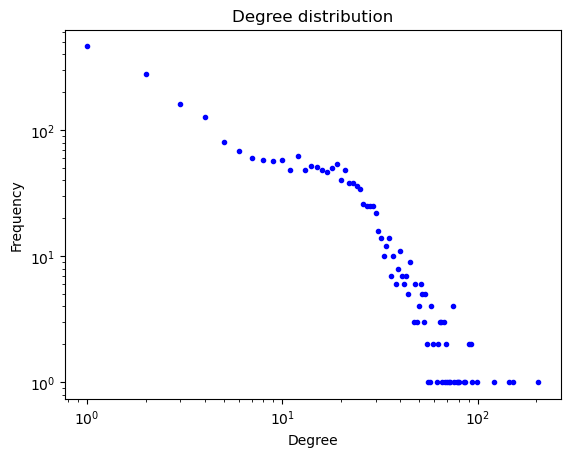

In [33]:
dibuja_distr_grado(G_EAT)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


<Axes: >

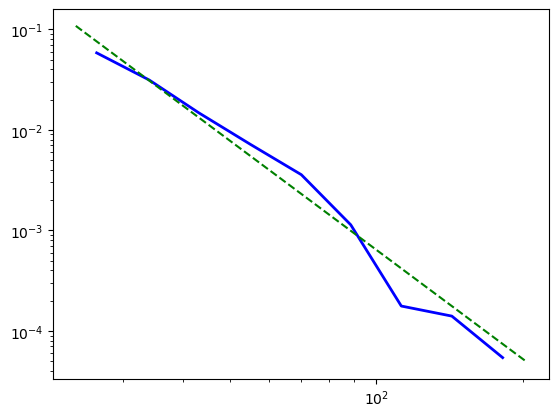

In [66]:
degree_sequence = sorted([d for n, d in G_EAT.degree()], reverse=True) 
fit = powerlaw.Fit(degree_sequence)
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

In [63]:
# Imprime el valor de alpha y xmin
print(fit.power_law.alpha, fit.power_law.xmin)

3.5957570079281296 24.0


In [69]:
# Comparación del ajuste con otras distribuciones
print(fit.distribution_compare('power_law', 'exponential'))
print(fit.distribution_compare('power_law', 'lognormal_positive'))

(14.981746817322962, 0.08528310887146591)
(-1.145184572106114, 0.41161434616667014)


# Medidas de centralidad

In [78]:
betweenness = nx.betweenness_centrality(G_EAT)
sorted_nodes_betweenness = sorted(betweenness.items(), key=lambda x:x[1], reverse=True)
sorted_nodes_betweenness[0:10]

KeyboardInterrupt: 

In [79]:
closeness = nx.closeness_centrality(G_EAT)
sorted_nodes_closeness = sorted(closeness.items(), key=lambda x:x[1], reverse=True)
sorted_nodes_closeness[0:10]

KeyboardInterrupt: 

In [ ]:
degrees = nx.degree_centrality(G_EAT)
sorted_nodes_degrees = sorted(degrees.items(), key=lambda x:x[1], reverse=True)
sorted_nodes_degrees[0:10]